In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

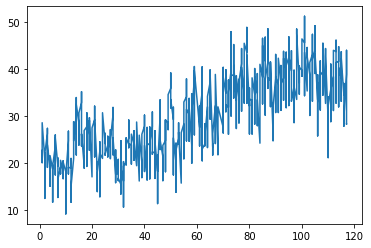

In [2]:
table = pd.read_csv('TISCH_tabla_corregida.csv')
plt.plot(table['id'], table['Temp'])

In [3]:
table['date'] = pd.to_datetime(table['date'])

                      Number  Temperature°C
date                                       
2019-05-09 12:00:00      1.5         21.000
2019-05-09 13:00:00      4.5         28.350
2019-05-09 14:00:00      8.5         28.825
2019-05-09 15:00:00     12.5         28.575
2019-05-09 16:00:00     16.5         27.450
...                      ...            ...
2020-03-14 07:00:00  29740.5         34.450
2020-03-14 08:00:00  29744.5         31.300
2020-03-14 09:00:00  29748.5         28.900
2020-03-14 10:00:00  29752.5         28.275
2020-03-14 11:00:00  29756.5         28.300

[2472 rows x 2 columns]


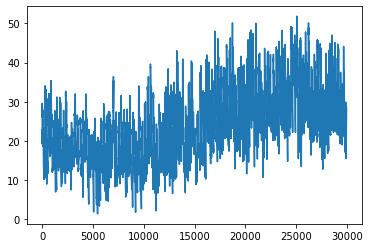

In [4]:
#### Gernerar las T desde el datalog

datalog = pd.read_excel('temp_tisch_datalogger.xls')
datalog.keys()
datalog['Temperature°C'].plot()
datalog['date'] = pd.to_datetime(datalog['Time'])
datalog.dtypes

datalog = datalog.set_index('date')
datalog2 = datalog.resample('H').mean()

#print(table2)
datalog2.to_csv('datalog_hora.csv')

table2 = table.copy()
table2 = table2.set_index('date')[288:]

#print(list(datalog2.index))
a = datalog2.loc[list(table2.index)]
print(a)
a.to_excel('todo_a_ver_si_anda.xls')

In [5]:
table['Q_mio'] = (table['I']*np.sqrt((297/(table['Temp']+273.3)*(table['Pr']/760)))-table['b'])/table['a']

suma = table.groupby(table['id']).sum()

#print(suma)
volumen = pd.DataFrame()
volumen['id'] = suma.index
volumen['vol'] = suma['Q_mio'] * 60

volumen.to_excel('volumen_tish_corregido2.xlsx')
